<a href="https://colab.research.google.com/github/faizanahemad/data-science-utils/blob/master/data_science_utils/vision/keras/SampleAPIUsage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReUsable Vision Lib

I have written a library with various needed functions and I will keep adding to it with each assignment.

[Main Library](https://github.com/faizanahemad/data-science-utils): This has util functions of other areas also that I use in my ML job

[Vision Part of Keras](https://github.com/faizanahemad/data-science-utils/tree/master/data_science_utils/vision/keras)

In this Notebook I will show usage of few important functions that I have.

- `get_mnist_data` and `get_mnist_labels`
- `inspect_predictions` : seeing how well model did with precision-recall plots
- `show_misclassified` : For making Misclassified examples grid and plotting their probas
- `visualize_layer`: For visualizing what activates a layer


I also demonstrate how to use `ImageDataGenerator` for both train and eval.

Once I get the cifar assignment I will add functionality in this NB for the cifar assignments.

**Don't Forget to Star and Watch (Github's upvote) the repo if you find this useful.**

# Installing the Lib

In [0]:
!pip install --upgrade --upgrade-strategy only-if-needed https://github.com/faizanahemad/data-science-utils/tarball/master > /dev/null

In [2]:
from data_science_utils.vision.keras import *

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
import numpy as np
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Add, SpatialDropout2D, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
import warnings
from keras.layers import Activation
%matplotlib inline
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.optimizers import SGD, Nadam, Adam
from keras.preprocessing.image import ImageDataGenerator

# Getting Data

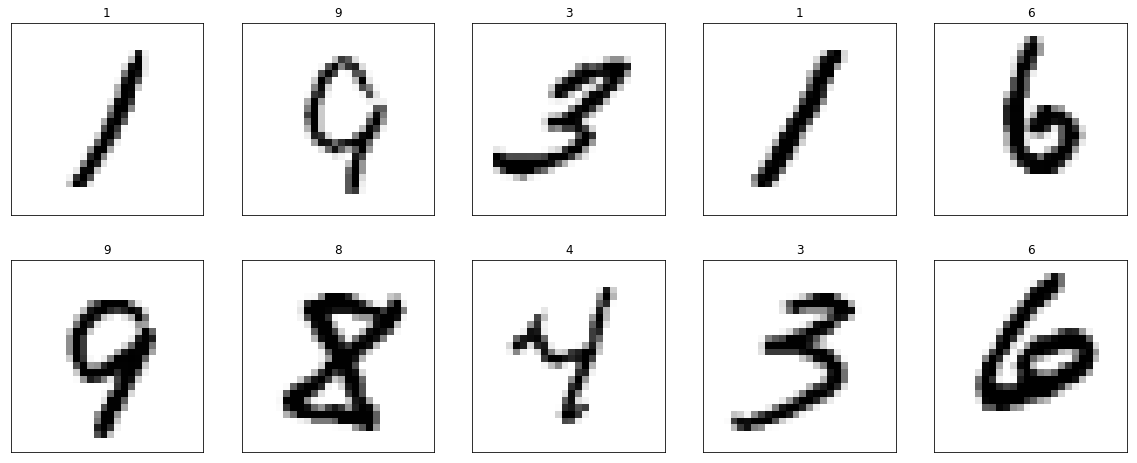

In [4]:

# This gets the data, reshapes it, then one hot encodes the target variables. These steps we did in our Notebooks.
X_train, Y_train, X_test, Y_test = get_mnist_data()
classes = get_mnist_labels()

show_examples(X_train[:10],Y_train[:10],classes)

# Defining a Model with ImageDataGenerator

In [5]:
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #12


model.add(Convolution2D(8, (3,3,), activation='relu')) # 10
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3,3,), activation='relu')) # 8
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4,4))

model.add(Flatten())
model.add(Activation('softmax'))
print("Params = ",model.count_params())

checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
optimizer = Adam(lr=0.01,)

model.compile(loss='categorical_crossentropy',
             optimizer=optimizer,
             metrics=['accuracy'])


datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True,)

datagen.fit(X_train)
train_history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=512,shuffle=True),
                    steps_per_epoch=int(np.ceil(len(X_train)/512)), 
                    epochs=5, verbose=1, validation_data=datagen.flow(X_test, Y_test, batch_size=512,shuffle=True), 
                    validation_steps = int(np.ceil(len(X_test)/512)), 
                    callbacks=callbacks_list,)

print("Layer Names: ",[layer.name for layer in model.layers[0:]])
val_metrics = (train_history.history['val_loss'][-1],train_history.history['val_acc'][-1])
print("Validation Loss",val_metrics)

# Load best weights here.
model.load_weights("model.hdf5")


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4))`
  app.launch_new_instance()


Params =  5094
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
118/118 [==============================] - 5s 43ms/step - loss: 0.4450 - acc: 0.8543 - val_loss: 0.1204 - val_acc: 0.9618
Epoch 2/5
118/118 [==============================] - 2s 18ms/step - loss: 0.1189 - acc: 0.9635 - val_loss: 0.0610 - val_acc: 0.9802
Epoch 3/5
118/118 [==============================] - 2s 19ms/step - loss: 0.0878 - acc: 0.9730 - val_loss: 0.0525 - val_acc: 0.9844
Epoch 4/5
118/118 [==============================] - 2s 19ms/step - loss: 0.0763 - acc: 0.9763 - val_loss: 0.0499 - val_acc: 0.9842
Epoch 5/5
118/118 [==============================] - 2s 19ms/step - loss: 0.0656 - acc: 0.9790 - val_loss: 0.0493 - val_acc: 0.9853
Layer Names:  ['conv2d_1', 'dropout_1', 'conv2d_2', 'dropout_2', 'conv2d_3', 'max_pooling2d_1', 'conv2d_4', 'dropout_3', 'conv2d_5', 'dropout_4', 'conv2d_6', 'max_pooling2d_2', 'conv2d_7', 'flatten_1', 'activation_1']
Validation Loss (0.04925101977586746, 0.9852999998092651)


# Making Predictions

```python
iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
model.predict_generator(iterator,steps=len(iterator))
```

## On Training Data

In [6]:

iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
score = model.evaluate_generator(iterator,steps=len(iterator))
iterator = datagen.flow(X_train, Y_train, batch_size=1024, shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))

# Inspect Predictions helps you see the precision recall and confusion matrix
_ = inspect_predictions(score, predictions,Y_train, classes=get_mnist_labels(),print_results=True, plot_results=False)



 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Score =  [0.05612739604711533, 0.9817999997456869]
Balanced Accuracy = 98.15% 


 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Score =  [0.05612739604711533, 0.9817999997456869]
Balanced Accuracy = 98.15% 



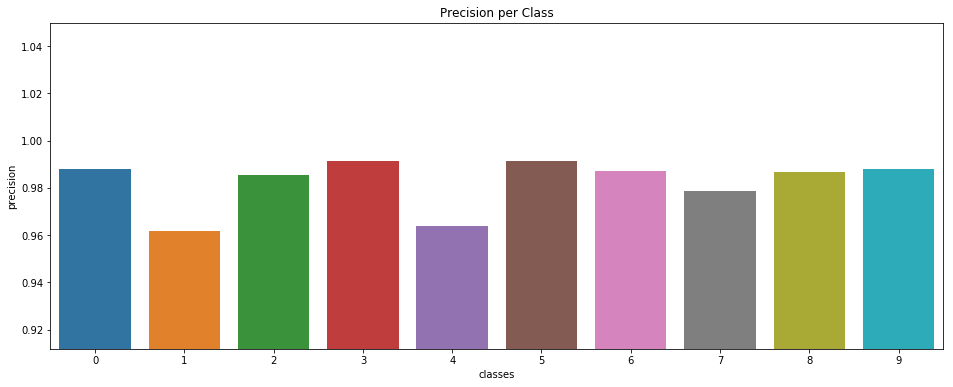

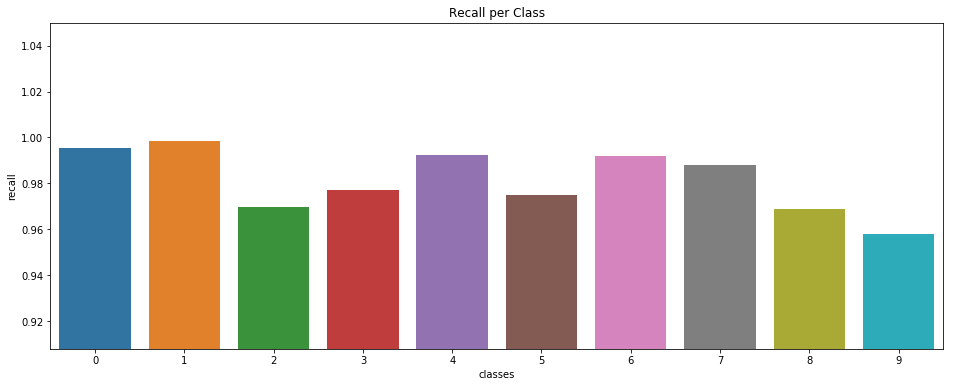

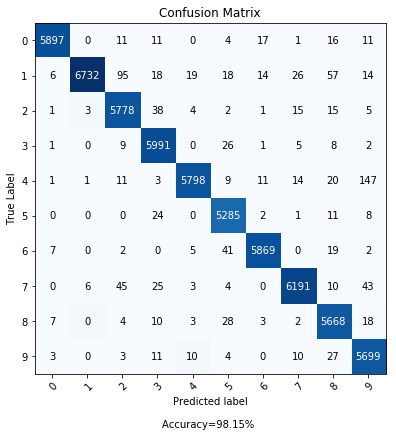

In [7]:
_ = inspect_predictions(score, predictions,Y_train, classes=get_mnist_labels(),print_results=True, plot_results=True)

## On Test Data

In [8]:

iterator = datagen.flow(X_test, Y_test, batch_size=1024, shuffle=False)
score = model.evaluate_generator(iterator,steps=len(iterator))
iterator = datagen.flow(X_test, Y_test, batch_size=1024, shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))

_ = inspect_predictions(score, predictions,Y_test, classes=get_mnist_labels(),print_results=True, plot_results=False)

 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Score =  [0.04925102071762085, 0.9853000005722046]
Balanced Accuracy = 98.51% 


 =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-=  =-= 
Score =  [0.04925102071762085, 0.9853000005722046]
Balanced Accuracy = 98.51% 



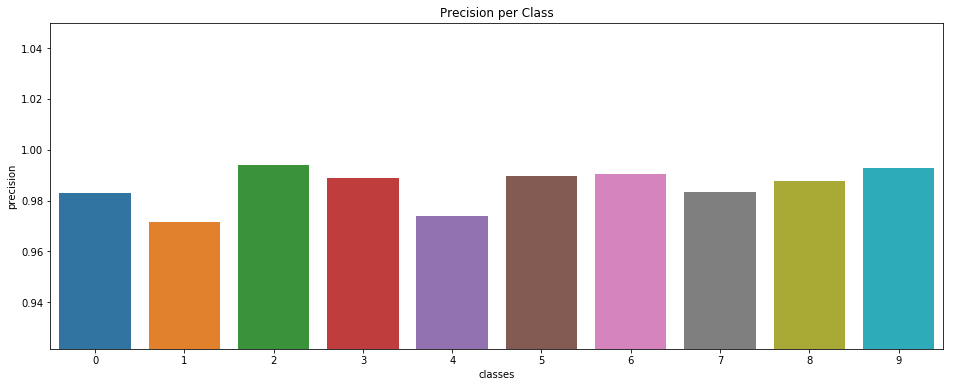

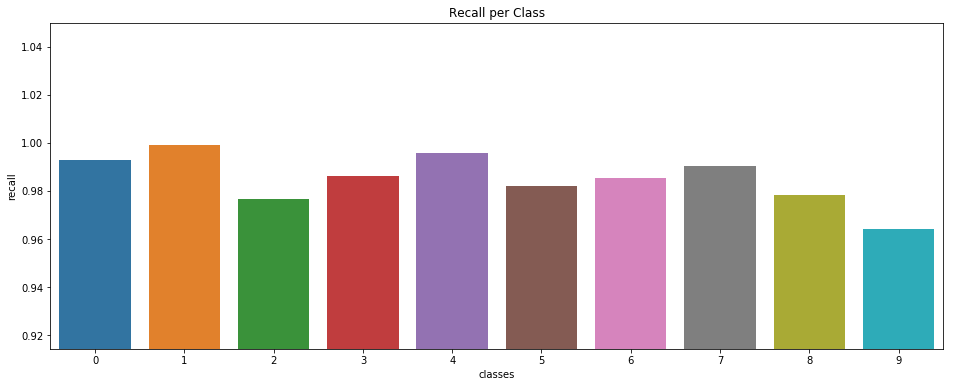

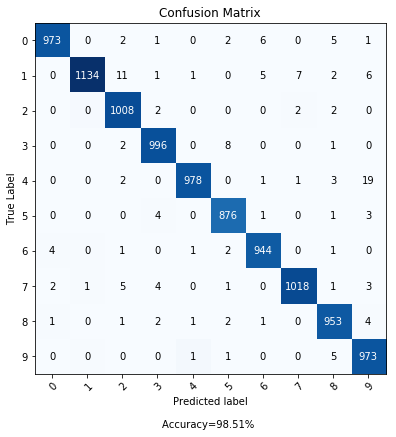

In [9]:
_ = inspect_predictions(score, predictions,Y_test, classes=get_mnist_labels(),print_results=True, plot_results=True)

# Showing 25 Misclassified Examples

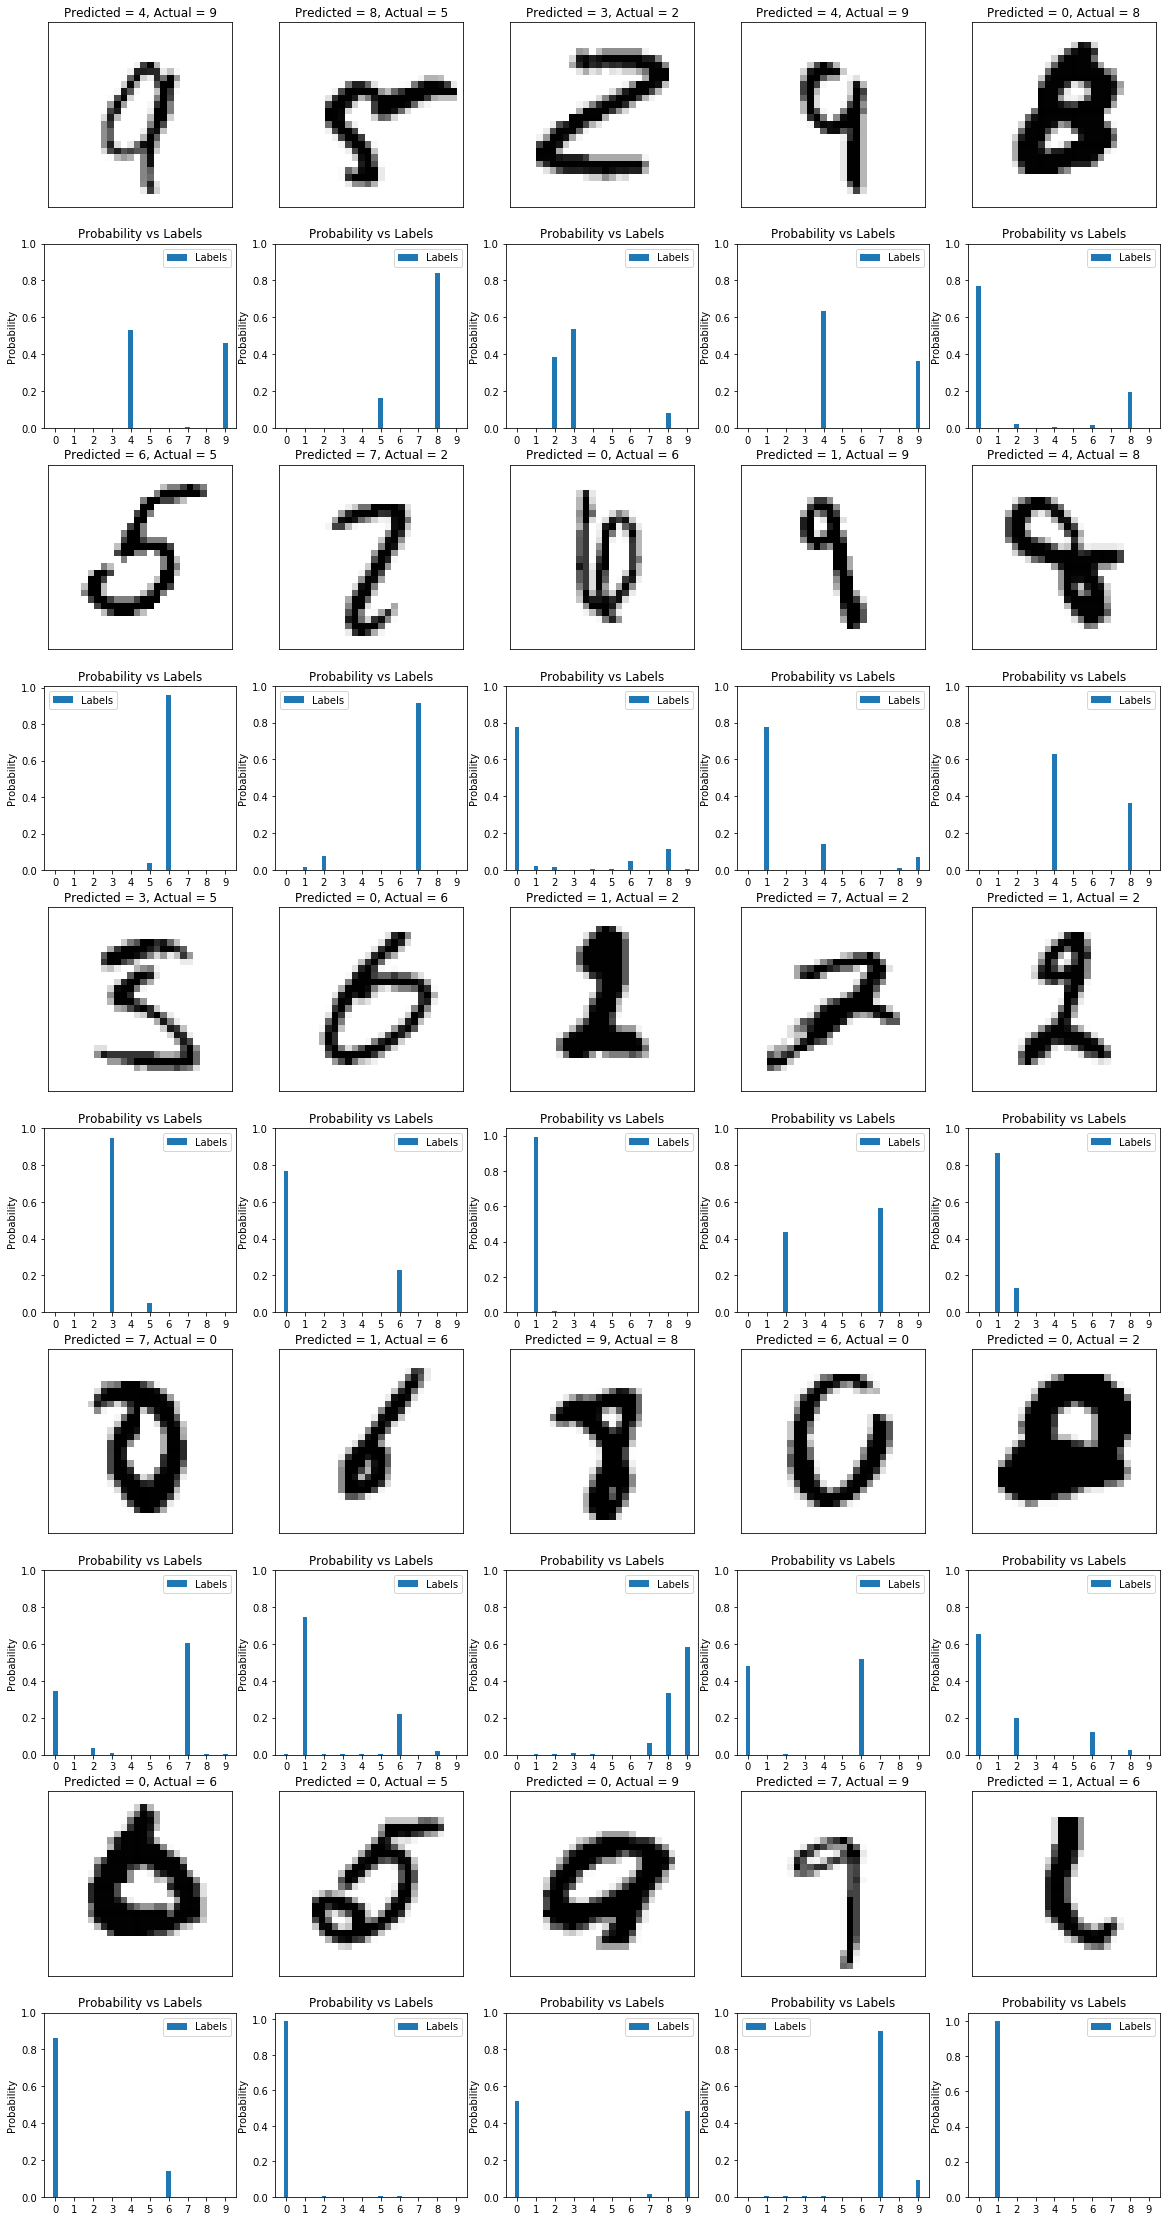

In [10]:
iterator = datagen.flow(X_test, Y_test, batch_size=1024, shuffle=False)
predictions = model.predict_generator(iterator,steps=len(iterator))

# Above 2 steps are same in Prediction and scoring steps as well

show_misclassified(X_test, Y_test, predictions[:len(Y_test)], classes=get_mnist_labels(), 
                       columns=5, total=25, 
                       pick_randomly=True, image_size_multiplier=4)

# Visualizing Layer Activations

```
model = Sequential()
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3,3, activation='relu')) # 24
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #12


model.add(Convolution2D(8, (3,3,), activation='relu')) # 10
model.add(Dropout(0.05))
model.add(Convolution2D(16, (3,3,), activation='relu')) # 8
model.add(Dropout(0.1))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 4,4))
```

Compute filters 0 to 8
  0   1   2   3   4   5   6   7 8 filter processed.
Filter Losses:  [2.2468112, 2.1733623, 1.7053106, 0.0, 2.7324035, 3.0631459, 3.1214256, 1.7583185]


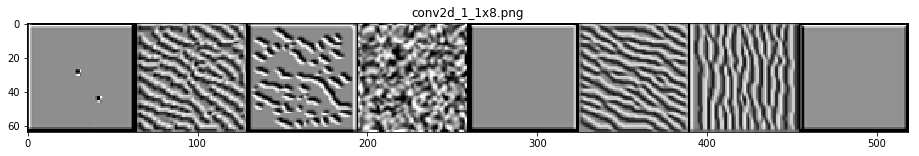

In [11]:
# Visualize 1st Conv Layer
visualize_layer(model,model.layers[0].name,upscaling_steps=5,
                    upscaling_factor=1.1,
                    output_dim=(64, 64),step=0.5,epochs=10)

Compute filters 0 to 16
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15 16 filter processed.
Filter Losses:  [5.488532, 2.7837303, 7.5759487, 8.274764, 1.0235996, 1.9959832, 0.0, 3.0361607, 0.012743443, 4.1896772, 7.674964, 0.0, 6.390201, 8.775286, 0.0, 3.127449]


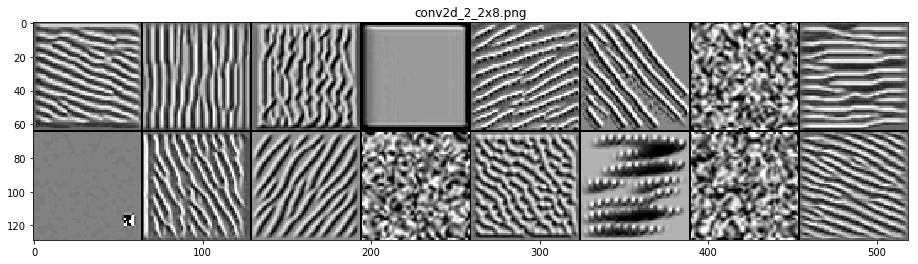

In [12]:
# Visualize 2nd Conv Layer
visualize_layer(model,model.layers[2].name,upscaling_steps=5,
                    upscaling_factor=1.1,
                    output_dim=(64, 64),step=0.5,epochs=10)

**Don't Forget to Star and Watch (Github's upvote) the repo if you find this useful.**